# Crappify

### Angélica Nayeli Rivas Bedolla

### Librerías

In [1]:
# path
from pathlib import Path
from shutil import copyfile #****

#idk
import random

# manejo de imagenes
import PIL
from PIL import Image, ImageDraw
from io import BytesIO

# fastai
import fastai.vision as fv

# visualizacion shida
from tqdm import tqdm_notebook as tqdm

### Funciones

In [2]:
def crappy_name(good_name):
    good_name = good_name.relative_to(path_good)
    crappy_file = path_crappy/iteracion/good_name
    crappy_file.parent.mkdir(parents=True, exist_ok=True)
    return crappy_file


def crappify(file): 
    crappy_file = crappy_name(file) # neural network
    
    img = Image.open(file) # neural network
    
    targ_sz = fv.resize_to(img, 256, use_min=True) # neural network
    img = img.resize(targ_sz, resample=PIL.Image.BILINEAR).convert('RGB') # neural network
    
    #img=file  # manual
    w,h = img.size
        
    for _ in range( random.randint(1,7) ): #crear elipses sin relleno
        x1, y1 = random.randint(-20,w//2),random.randint(-20,h//2)
        x2, y2 = random.randint(x1,w),random.randint(y1,h)
        ImageDraw.Draw(img).ellipse(((x1, y1), (x2, y2)), outline="white")

    for _ in range( random.randint(1,7) ): #crear arcos sin relleno
        x1, y1 = random.randint(-20,w//2),random.randint(-20,h//2)
        x2, y2 = random.randint(x1,w),random.randint(y1,h)
        ImageDraw.Draw(img).arc(((x1, y1), (x2, y2)), random.randint(0,360), random.randint(0,360))

    for _ in range( random.randint(1,7) ): #crear arco con linea recta que une puntos finales sin relleno
        x1, y1 = random.randint(-20,w//2),random.randint(-20,h//2)
        x2, y2 = random.randint(x1,w),random.randint(y1,h)
        ImageDraw.Draw(img).chord(((x1, y1), (x2, y2)), random.randint(0,360), random.randint(0,360))

    for _ in range( random.randint(1,7) ): #crear arco con linea recta d elos puntos al centro del circulo sin relleno
        x1, y1 = random.randint(-20,w//2),random.randint(-20,h//2)
        x2, y2 = random.randint(x1,w),random.randint(y1,h)
        ImageDraw.Draw(img).pieslice(((x1, y1), (x2, y2)), random.randint(0,360), random.randint(0,360))

    shape = [(random.randint(-20,w),random.randint(-20,h)) for _ in range(random.randint(2, 7))]
    ImageDraw.Draw(img).line(shape, fill="white", width=1) # dibujar serie de lineas

    shape = [(random.randint(-20,w),random.randint(-20,h)) for _ in range(random.randint(2, 7))]
    ImageDraw.Draw(img).polygon(shape, outline="white") # dibujar poligono (serie de lineas que se juntan sus extremos por linea recta sin relleno)
    
    #img
    img.save(crappy_file)#, quality=random.randint(20,50))
    #img.save("sys33","png") # manual

## Pasar las imágenes por el crappify

In [3]:
path_good   = Path("../Images/StyleGAN") # neural network
path_crappy = Path("../Images/crapifiadas") # neural network
iteracion   = Path("02") #nuevo folder para la iteracion

In [4]:
all_files = fv.get_image_files(path_good,recurse=True) # neural network

In [5]:
crappy_name(all_files[0]) # neural network

PosixPath('../Images/crapifiadas/02/58276.png')

In [6]:
path_crappy.mkdir(parents=True, exist_ok=True) # neural network

In [7]:
for file in tqdm(all_files): # neural network
    try:
        crappify(file)
    except:
        print(file) # si hubo un archivo que no se descargo completamente 
        pass

## Resultado

In [8]:
img = Image.open("../Images/crapifiadas/02/09069.png") # manual

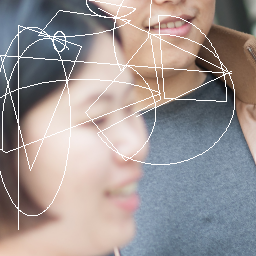

In [9]:
img

# Referencias

1. Miguel Raggi. (2019). [05.Crappify.ipynb](https://github.com/mraggi/NeuralSensei/blob/master/05.Crappify.ipynb).

2. Pillow Documentation. [ImageDraw Module](https://pillow.readthedocs.io/en/3.1.x/reference/ImageDraw.html).

3. David Naranjo. [¿Cómo mover o copiar archivos o carpetas en Linux?](https://blog.desdelinux.net/como-mover-o-copiar-archivos-o-carpetas-en-linux/).